# SI 370: Classification

## Objectives:
- Be able to perform classifications using the following methods and interpret their results.
  - Naive Bayes
  - Decision Tree
  - Random Forest
  
Note: some slides from Eytan Adar and Kevyn Collins-Thompson


### NOTE: use conda to install the ```pydotplus``` and ```graphviz``` packages before starting this notebook

![](resources/classification/Slide02.png)

![](resources/classification/Slide03.png)

![](resources/classification/Slide04.png)

![](resources/classification/Slide05.png)

![](resources/classification/Slide06.png)

![](resources/classification/Slide07.png)

![](resources/classification/Slide08.png)

![](resources/classification/Slide09.png)

![](resources/classification/Slide10.png)

![](resources/classification/Slide11.png)

![](resources/classification/Slide12.png)

![](resources/classification/Slide13.png)

![](resources/classification/Slide14.png)

![](resources/classification/Slide15.png)

![](resources/classification/Slide16.png)

![](resources/classification/Slide17.png)

![](resources/classification/Slide18.png)

![](resources/classification/Slide19.png)

![](resources/classification/Slide20.png)

![](resources/classification/Slide21.png)

![](resources/classification/Slide22.png)

![](resources/classification/Slide23.png)

![](resources/classification/Slide24.png)

![](resources/classification/Slide25.png)

![](resources/classification/Slide26.png)

![](resources/classification/Slide27.png)

![](resources/classification/Slide28.png)

![](resources/classification/Slide29.png)

![](resources/classification/Slide30.png)

![](resources/classification/Slide31.png)

![](resources/classification/Slide32.png)

![](resources/classification/Slide33.png)

![](resources/classification/Slide43.png)

## Classification using scikit-learn

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd

from sklearn import metrics
import os


In [2]:
# Filter all warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the usual dataset
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# split into train and test (we'll see a better way in the next block)
np.random.seed(200)
msk = np.random.rand(len(df_iris)) <= 0.7
df_iris_train = df_iris[msk]
df_iris_test = df_iris[~msk]

In [5]:
len(df_iris_train),len(df_iris_test)

(98, 52)

The same thing, this time using a scikit_learn function:

In [6]:
df_iris_train,df_iris_test = train_test_split(df_iris, test_size=0.3)

In [7]:
len(df_iris_train),len(df_iris_test)

(105, 45)

# 1. Decision Trees

## 1.1 Train a decision tree classifier

We will train a decision tree classifier to classify iris species. Here are the specifications:
- __Objective__: predict which species an iris instance belongs to.
- __Possible classes__: "setosa", "versicolor", and "virginica"
- __Features__: all four features


In [8]:
## Build and train the classifier
dt_model = sktree.DecisionTreeClassifier(max_depth=1,
                                         criterion='entropy')
# given first 4 columns, learn the species
dt_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

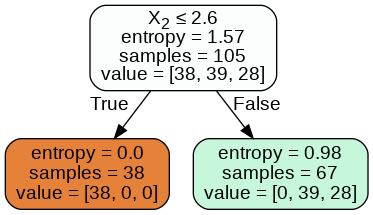

In [10]:
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

38 values identified as first species, entropy is 0, so no question about this.

To interpret the above plot, please read through the following paragraphs quoted from http://www.thegrimmscientist.com/tutorial-decision-trees/, which has slightly different results than our data set because they used alightly different data.  Their results looks like:

![](http://www.thegrimmscientist.com/content/images/2017/06/TreeDepth1.png)

> This image needs a bit of explanation. The top node represents the whole dataset. The whole dataset has 150 samples, as seen in the third line of that first node. We'll explain entropy more later, but for now, think of it as a formalization of the amount of uncertainty in the data. The first line on the top node gives us the decision our tree magically found. When that decision "petal width is less than or equal to 0.80 cm" is true for a given sample, that sample is assigned to the bottom left node. When it is false, the sample is assigned to the bottom right node.

>On these two leaf nodes, the number of samples is shown on the second line. The number of samples broken down by class is on the third line. On the left leaf node, all 50 of the samples in class 1 and none from the other two classes are represented. Given the decision and the data at hand, we are certain to have a sample in class 1 (setosa). Since we are totally certain about that, uncertainty (entropy) is 0.

>When our petal width <= 0.80 decider is false, the given sample is assigned to the right node. It works out that all 50 samples from class 2 (versicolor) and all 50 samples from class 3 (virginica) are assigned to this right leaf. Thus, when we're at this leaf given the decision, we're evenly unsure whether we're in class 2 or class 3. The amount of uncertainty this works out to be is 1.0. Again, we'll explain the math and meaning behind that later.

### Question 1: Train a decision tree with `max_depth=2`. Plot it as a graph.


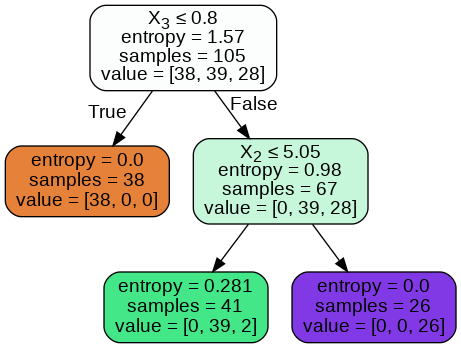

In [14]:
### YOUR CODE HERE
dt_model = sktree.DecisionTreeClassifier(max_depth=2, criterion='entropy')

dt_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 1.2 Deploying a Decision Tree Classifier

With our trained decision tree with `max_depth=2` , we can see how good our fit is by using our testing dataset.

In [15]:
# this is testing the model 
predicted_labels = dt_model.predict(df_iris_test.ix[:,:4])
df_iris_test['predicted_label_tree'] = predicted_labels
df_iris_test.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_label_tree
144,6.7,3.3,5.7,2.5,virginica,virginica
121,5.6,2.8,4.9,2.0,virginica,versicolor
131,7.9,3.8,6.4,2.0,virginica,virginica
98,5.1,2.5,3.0,1.1,versicolor,versicolor
107,7.3,2.9,6.3,1.8,virginica,virginica
38,4.4,3.0,1.3,0.2,setosa,setosa
101,5.8,2.7,5.1,1.9,virginica,virginica
54,6.5,2.8,4.6,1.5,versicolor,versicolor
148,6.2,3.4,5.4,2.3,virginica,virginica
36,5.5,3.5,1.3,0.2,setosa,setosa


And we can determine our overall accuracy:

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy = accuracy_score(df_iris_test.species, predicted_labels)

In [18]:
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 82.22%


In [19]:
# utility class to compare the predictions versus ground truth
def comparePlot(input_frame,real_column,predicted_column):
    df_a = input_frame.copy()
    df_b = input_frame.copy()
    df_a['label_source'] = 'Species'
    df_b['label_source'] = 'Classifier'
    df_a['label'] = df_a[real_column]
    df_b['label'] = df_b[predicted_column].apply(lambda x: 'Predict %s'%x)
    df_c = pd.concat((df_a, df_b), axis=0, ignore_index=True)
    sns.lmplot(x='sepal_length', y='sepal_width', col='label_source',
               hue='label', data=df_c, fit_reg=False, size=4);

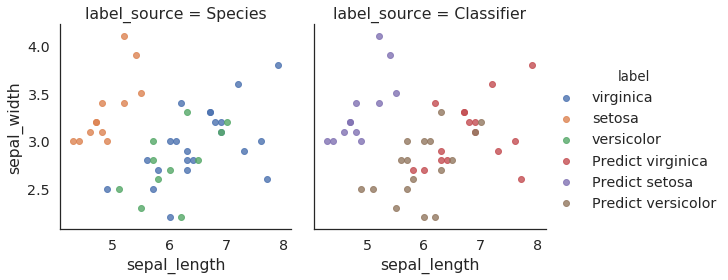

In [20]:
# see the difference
comparePlot(df_iris_test,"species","predicted_label_tree")

# 2. Random Forest

Let's build a random forest classifier to classify irises into three species.
- __Objective__: predict which species an iris instance belongs to.
- __Possible classes__: "setosa", "versicolor", and "virginica"
- __Features__: all four features

In [21]:
# build a random forest
rf_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True, criterion='entropy')
rf_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

<font color="red">Use the same approach that you did in predicting the Decision Tree Classifier.  Note that you don't need to use .sample()

In [22]:
# now do the predicting... use the same approach as you did in testing the Decision Tree Classifier above,
# but don't include the .sample() line
# this is testing the model 
predicted_labels = rf_model.predict(df_iris_test.ix[:,:4])
df_iris_test['predicted_rf_tree'] = predicted_labels

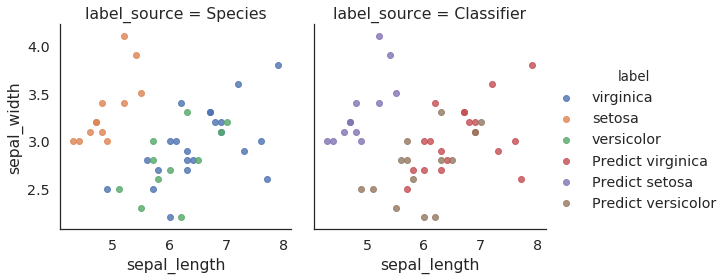

In [23]:
comparePlot(df_iris_test,"species","predicted_rf_tree")

We can also check __feature importance__ as dumped by the model.

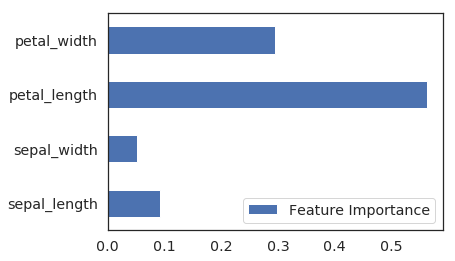

In [24]:
# Check feature importance
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=df_iris_train.columns[:4]).plot(kind='barh')

### Question 2: What is the most important feature in the model?

Petal length. This is the most influential when deciding which type of iris it is.

## Tuning the model
The model paramters are called _hyperparameters_.  Setting them to appropriate values and running the model experiment again can be tedious, so we have a technique called cross-validation to help with this.

From http://scikit-learn.org/stable/modules/cross_validation.html:

> When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

> However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

> A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

> A model is trained using  of the folds as training data;
the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

In [48]:
scores = cross_val_score(rf_model, df_iris_train.ix[:,:4],df_iris_train.species, cv=5)

The mean score and the 95% confidence interval (2 x the standard deviation) of the score estimate are hence given by:



In [49]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.12)


But let's say we want to fiddle with the hyperparameters.

To do this, we first set up a parameter grid with the lists of paramters we want to try:

In [50]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25],
                 'max_depth': [2, 5, 7, 9],
             }

In [51]:
from sklearn.grid_search import GridSearchCV


We now run the cross-validation on the classifier. Note: this will take a while (why?).

In [52]:
grid_clf = GridSearchCV(rf_model, param_grid, cv=10)
grid_clf.fit(df_iris_train.ix[:,:4],df_iris_train.species)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 25], 'max_depth': [2, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

and extract the best model:

In [53]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

Or perhaps we're just interested in the best paramters.

In [54]:
grid_clf.best_params_

{'max_depth': 2, 'n_estimators': 5}

In case we want the details:

In [55]:
grid_clf.grid_scores_

[mean: 0.98095, std: 0.03636, params: {'max_depth': 2, 'n_estimators': 5},
 mean: 0.96190, std: 0.08332, params: {'max_depth': 2, 'n_estimators': 10},
 mean: 0.96190, std: 0.08332, params: {'max_depth': 2, 'n_estimators': 15},
 mean: 0.95238, std: 0.08381, params: {'max_depth': 2, 'n_estimators': 20},
 mean: 0.95238, std: 0.08381, params: {'max_depth': 2, 'n_estimators': 25},
 mean: 0.96190, std: 0.04454, params: {'max_depth': 5, 'n_estimators': 5},
 mean: 0.95238, std: 0.08381, params: {'max_depth': 5, 'n_estimators': 10},
 mean: 0.95238, std: 0.08381, params: {'max_depth': 5, 'n_estimators': 15},
 mean: 0.96190, std: 0.08332, params: {'max_depth': 5, 'n_estimators': 20},
 mean: 0.97143, std: 0.04166, params: {'max_depth': 5, 'n_estimators': 25},
 mean: 0.95238, std: 0.08381, params: {'max_depth': 7, 'n_estimators': 5},
 mean: 0.94286, std: 0.08332, params: {'max_depth': 7, 'n_estimators': 10},
 mean: 0.95238, std: 0.08381, params: {'max_depth': 7, 'n_estimators': 15},
 mean: 0.96190,

### Question 3: Run the best model from the cross-validation on the test data.